Social coupling: mental health effect of COVID-19 measures
====

This notebook revolves around the analysis of the mental health data, in [PROMIS scale](http://www.healthmeasures.net/score-and-interpret/interpret-scores/promis/reference-populations), that was gathered during the lockdown by Melanie Beeckman.

## Tools

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

## Data Melanie

In [24]:
rawdata_wav1 = pd.read_csv('../data/raw/social/Gedrag_Welzijn_data_WAVE1.csv')
# # create time stamps of data
for ind, val in enumerate(rawdata_wav1['datestamp']):
    if val[1]=='/':
        rawdata_wav1.loc[ind, 'datestamp'] = '0'+rawdata_wav1.loc[ind, 'datestamp']
# rawdata_wav1.set_index('datestamp', inplace=True)
rawdata_wav1.index = pd.to_datetime(rawdata_wav1['datestamp'], format='%m/%d/%Y %H:%M:%S')
# rawdata_wav1.columns

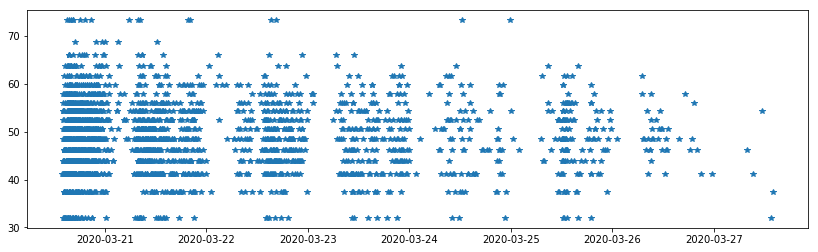

In [28]:
fig, ax = plt.subplots(figsize=(14,4))
ax.plot(rawdata_wav1['Slaap_tot_T'], '*')